In [1]:

# importing necessary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
import six, sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV


In [2]:
# reading the dataset
heart = pd.read_csv('./dataset/heart_v2.csv') 
heart.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [3]:
# let's get the basic info of the dataset 
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [4]:
# describing the dataset 
heart.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


- By looking at the max and min of all the columns, it looks like we don't have any outliers in the dataset. Let's plot some boxplots to be sure that our data has no outliers 

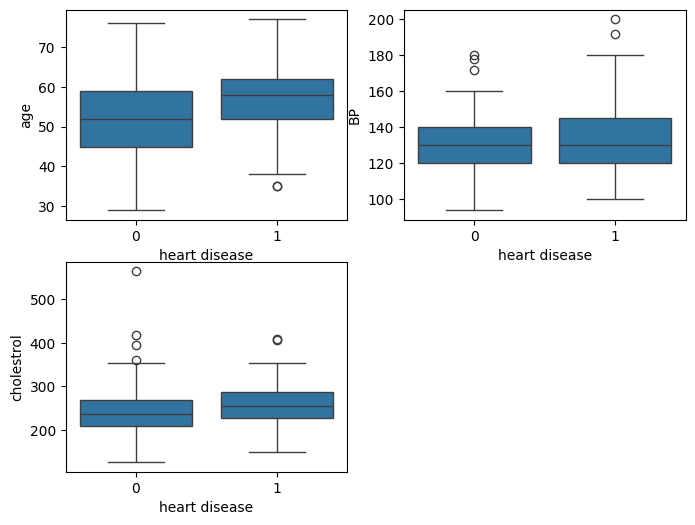

In [5]:
# plotting boxplots for numerical columns to check for outliers and interquartile range
i = 1
plt.figure(figsize=(8,6))
for col in heart.columns:
    if col!='sex' and col!='heart disease':
        plt.subplot(2,2,i)
        sns.boxplot(x='heart disease', y=col, data = heart)
        i+=1
plt.show()

- Looks like we do have some outliers in our dataset based on whether a person has disease or not. Let's also try plotting without any condition and see if individually they contain any outliers. 


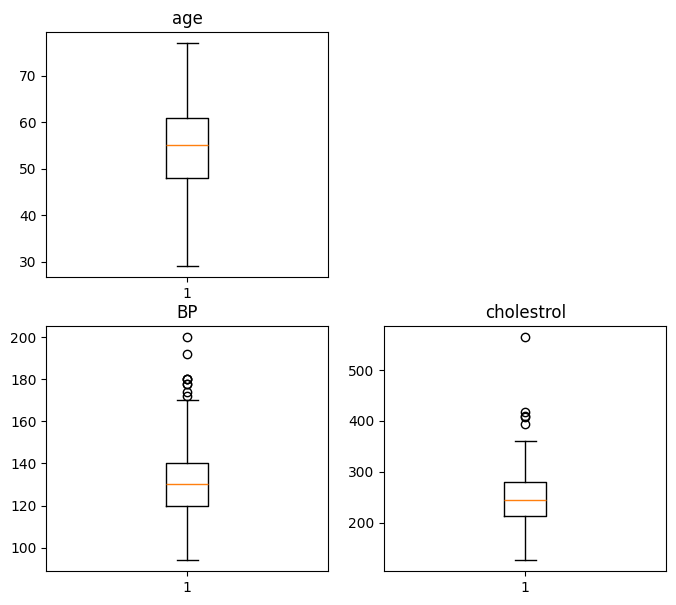

In [6]:
plt.figure(figsize=(8,7))
for i, col in enumerate(heart.columns):
    if col!='heart disease' and col != 'sex':
        plt.subplot(2,2,i+1)
        plt.boxplot(heart[col])
        plt.title("{}".format(col))
plt.show()

- Yes, we do have outliers in BP and cholestrol columns, looks like few people have unusually high BP or cholestrol. Let's cap our data and any value having BP higher than 180 will be capped to 180 and any value higher than 400 cholestrol level will be capped to 400. 

In [7]:
# let's cap BP and cholestrol columns 
heart.BP = heart.BP.apply(lambda x: x if x <= 180 else 180)
heart.cholestrol = heart.cholestrol.apply(lambda x: x if x <= 400 else 400)

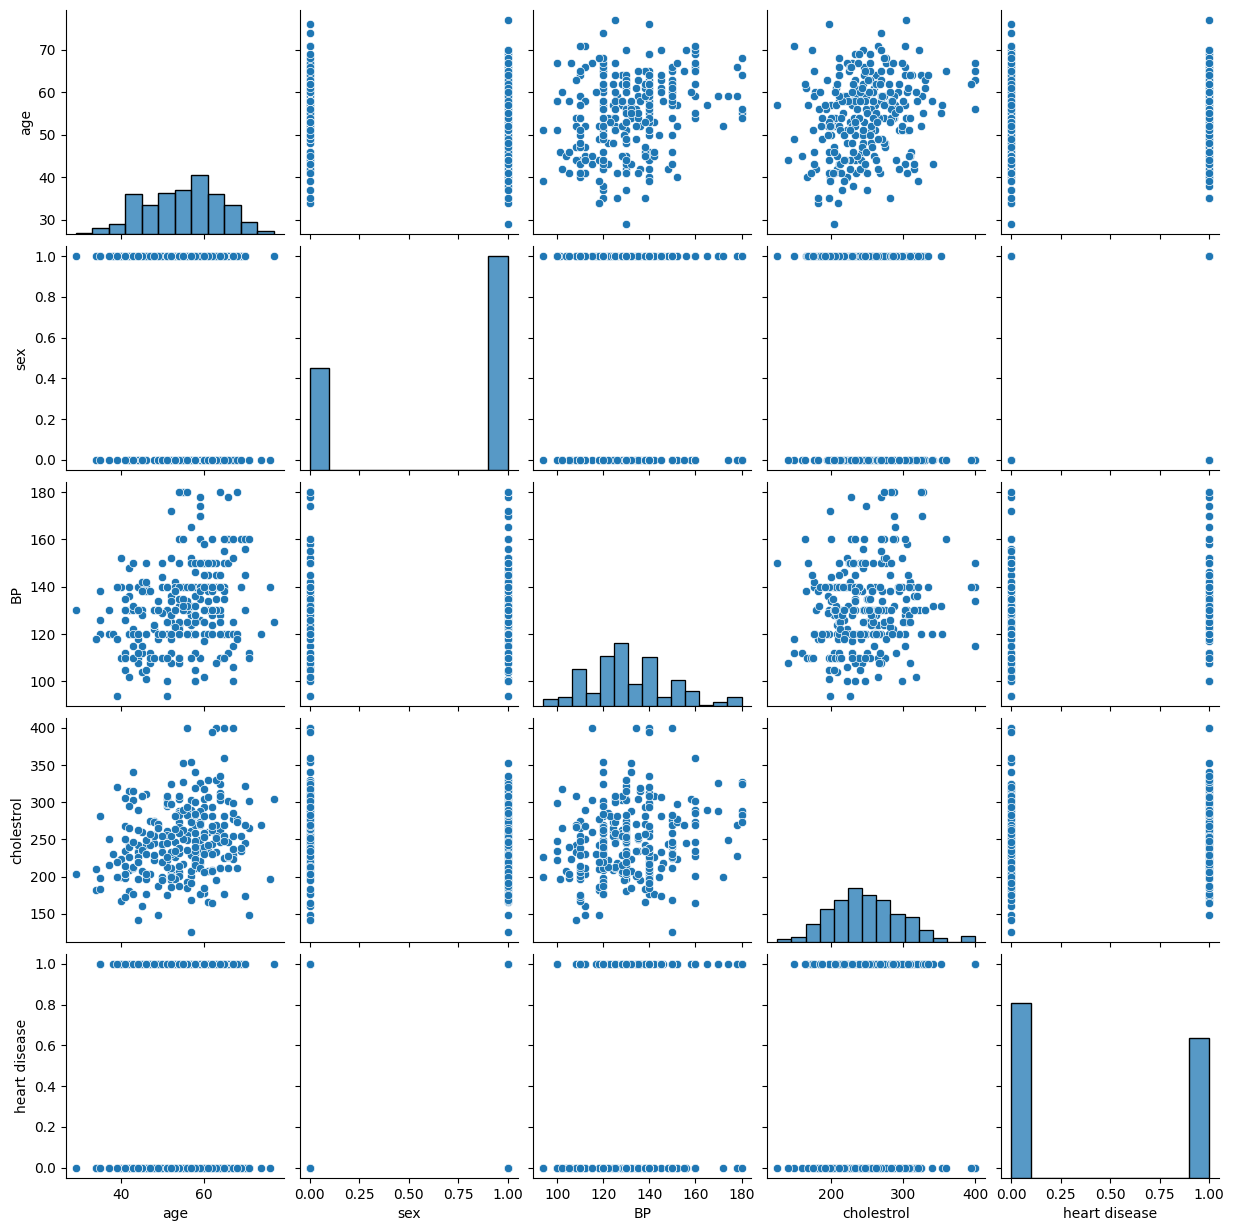

In [8]:
# let's check the correlation between all the numerical columns using pairplot
sns.pairplot(heart)

-  There is no such relationship between any variables 

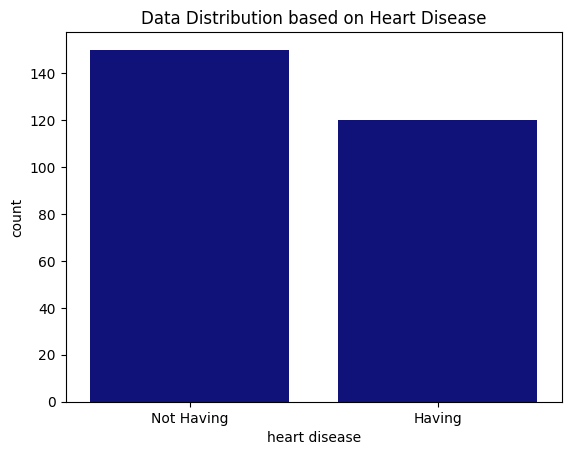

In [9]:
# let's check the our target variable (heart disease (0(No),1(Yes))) distribution
sns.countplot(x=heart['heart disease'], color='darkblue')
plt.title('Data Distribution based on Heart Disease')
plt.xticks([0, 1], ['Not Having', 'Having'])
plt.show()

- Looks like our data is almost even with more people not having heart disease which is acceptable and let's not do any king of sampling or selection since this distribution is fine. 

# Model building

### Train-test split

In [10]:
# features
X = heart.drop('heart disease', axis=1)
# target variable
y = heart['heart disease']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=39)
X_train.shape, X_test.shape

((202, 4), (68, 4))

## Building Decision Tree model 
-  Keeping depth only at 3 for now.

In [11]:
# instantiating 
dt = DecisionTreeClassifier(max_depth=3)

In [12]:
# fitting 
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

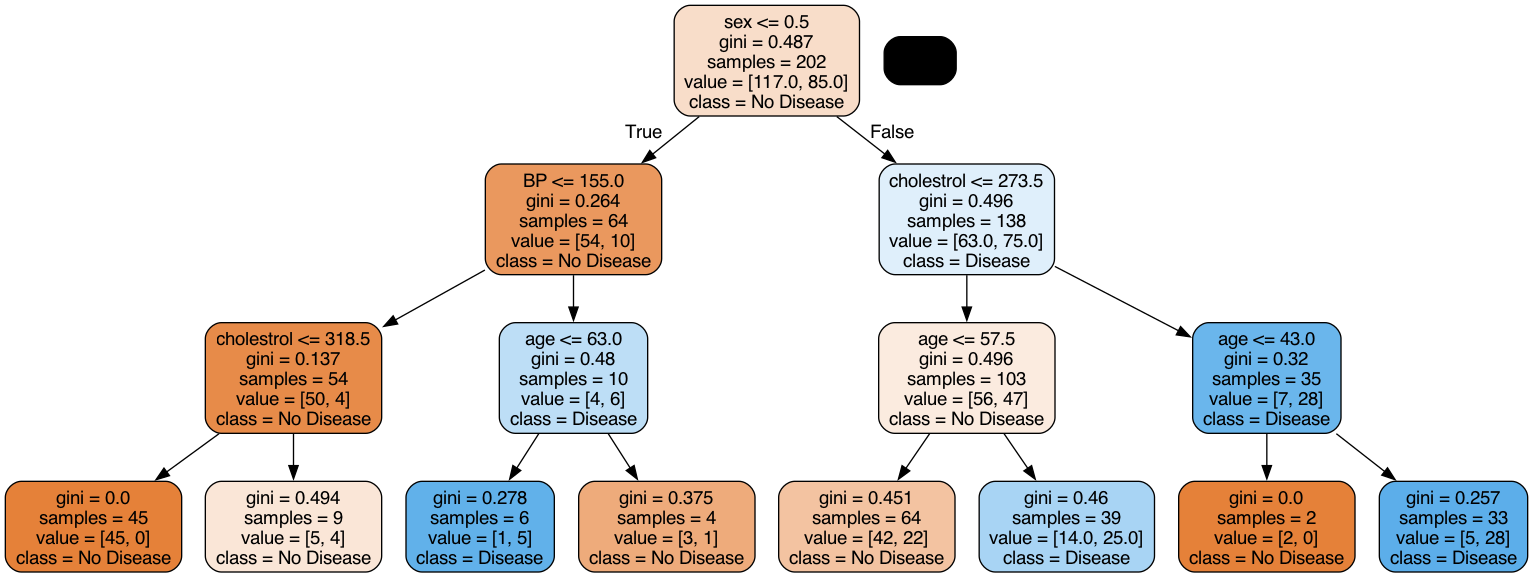

In [13]:
# let's visualise how our tree looks like before making any predictions
dot_data = StringIO()

# creating graphviz object and putting it into dot_data
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, feature_names=X.columns,
                class_names=['No Disease', 'Disease'])

# using dot_data creating graph 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# function to create image
Image(graph.create_png())

### Making Predictions

In [14]:
# predicting on the training set
y_train_pred = dt.predict(X_train)

# predicting on the test set
y_test_pred = dt.predict(X_test) 

In [15]:
# let's check the accuracy and also have a look at the confusion matrix for training set
confTrain = confusion_matrix(y_train, y_train_pred)
print("Accuracy on the training set:", accuracy_score(y_train, y_train_pred), '\n')
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
print("Sensitivity:", confTrain[1][1] / (confTrain[1][1]+confTrain[1][0]))

Accuracy on the training set: 0.7673267326732673 

Confusion Matrix:
 [[97 20]
 [27 58]] 

Sensitivity: 0.6823529411764706


- We got an accuracy of 76% which is pretty good, given the fact that dataset is really small. 
- Out of the people who have the disease, we were able to correctly predict 68% of them only which is not very good since we need to correctly identify atleast 95% of the people who have the disease. 

In [16]:
# checking same metrics for test set as well 
confTest = confusion_matrix(y_test, y_test_pred)
print("Accuracy on the Test set:", accuracy_score(y_test, y_test_pred), '\n')
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
print("Sensitivity:", confTest[1][1] / (confTest[1][1]+confTest[1][0]))

Accuracy on the Test set: 0.6176470588235294 

Confusion Matrix:
 [[29  4]
 [22 13]] 

Sensitivity: 0.37142857142857144


- Our accuracy on test set is very low i.e. only 61.7%.
- Sensitivity is even worse, which means we are unable to correctly identify the people who are having the disease.

#### Hyperparameter Tuning 
- We will tune our hyperparameters and improve our model's performance on unseen data.

In [17]:
# before tuning, let's create some helper functions to evaluate model performance and create a graph for DT
def get_dt_graph(dt_classifier):
    dot_data = StringIO()

    # creating graphviz object and putting it into dot_data
    export_graphviz(dt_classifier, out_file=dot_data, filled=True, rounded=True, feature_names=X.columns,
                    class_names=['No Disease', 'Disease'])

    # using dot_data creating graph 
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [18]:
def evaluate_model(dt_classifier):
    y_train_pred =  dt_classifier.predict(X_train)
    confTrain = confusion_matrix(y_train, y_train_pred)
    print("Accuracy on the training set:", accuracy_score(y_train, y_train_pred), '\n')
    print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred), '\n')
    print("Sensitivity:", confTrain[1][1] / (confTrain[1][1]+confTrain[1][0]))
    
    print('-'*50)
    
    # checking same metrics for test set as well 
    y_test_pred =  dt_classifier.predict(X_test)
    confTest = confusion_matrix(y_test, y_test_pred)
    print("Accuracy on the Test set:", accuracy_score(y_test, y_test_pred), '\n')
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred), '\n')
    print("Sensitivity:", confTest[1][1] / (confTest[1][1]+confTest[1][0]))
    
    


In [19]:
# since our helper functions are created let's now build DT without any hyperparameters control, free to run 
dt_default = DecisionTreeClassifier(random_state=39)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=39)

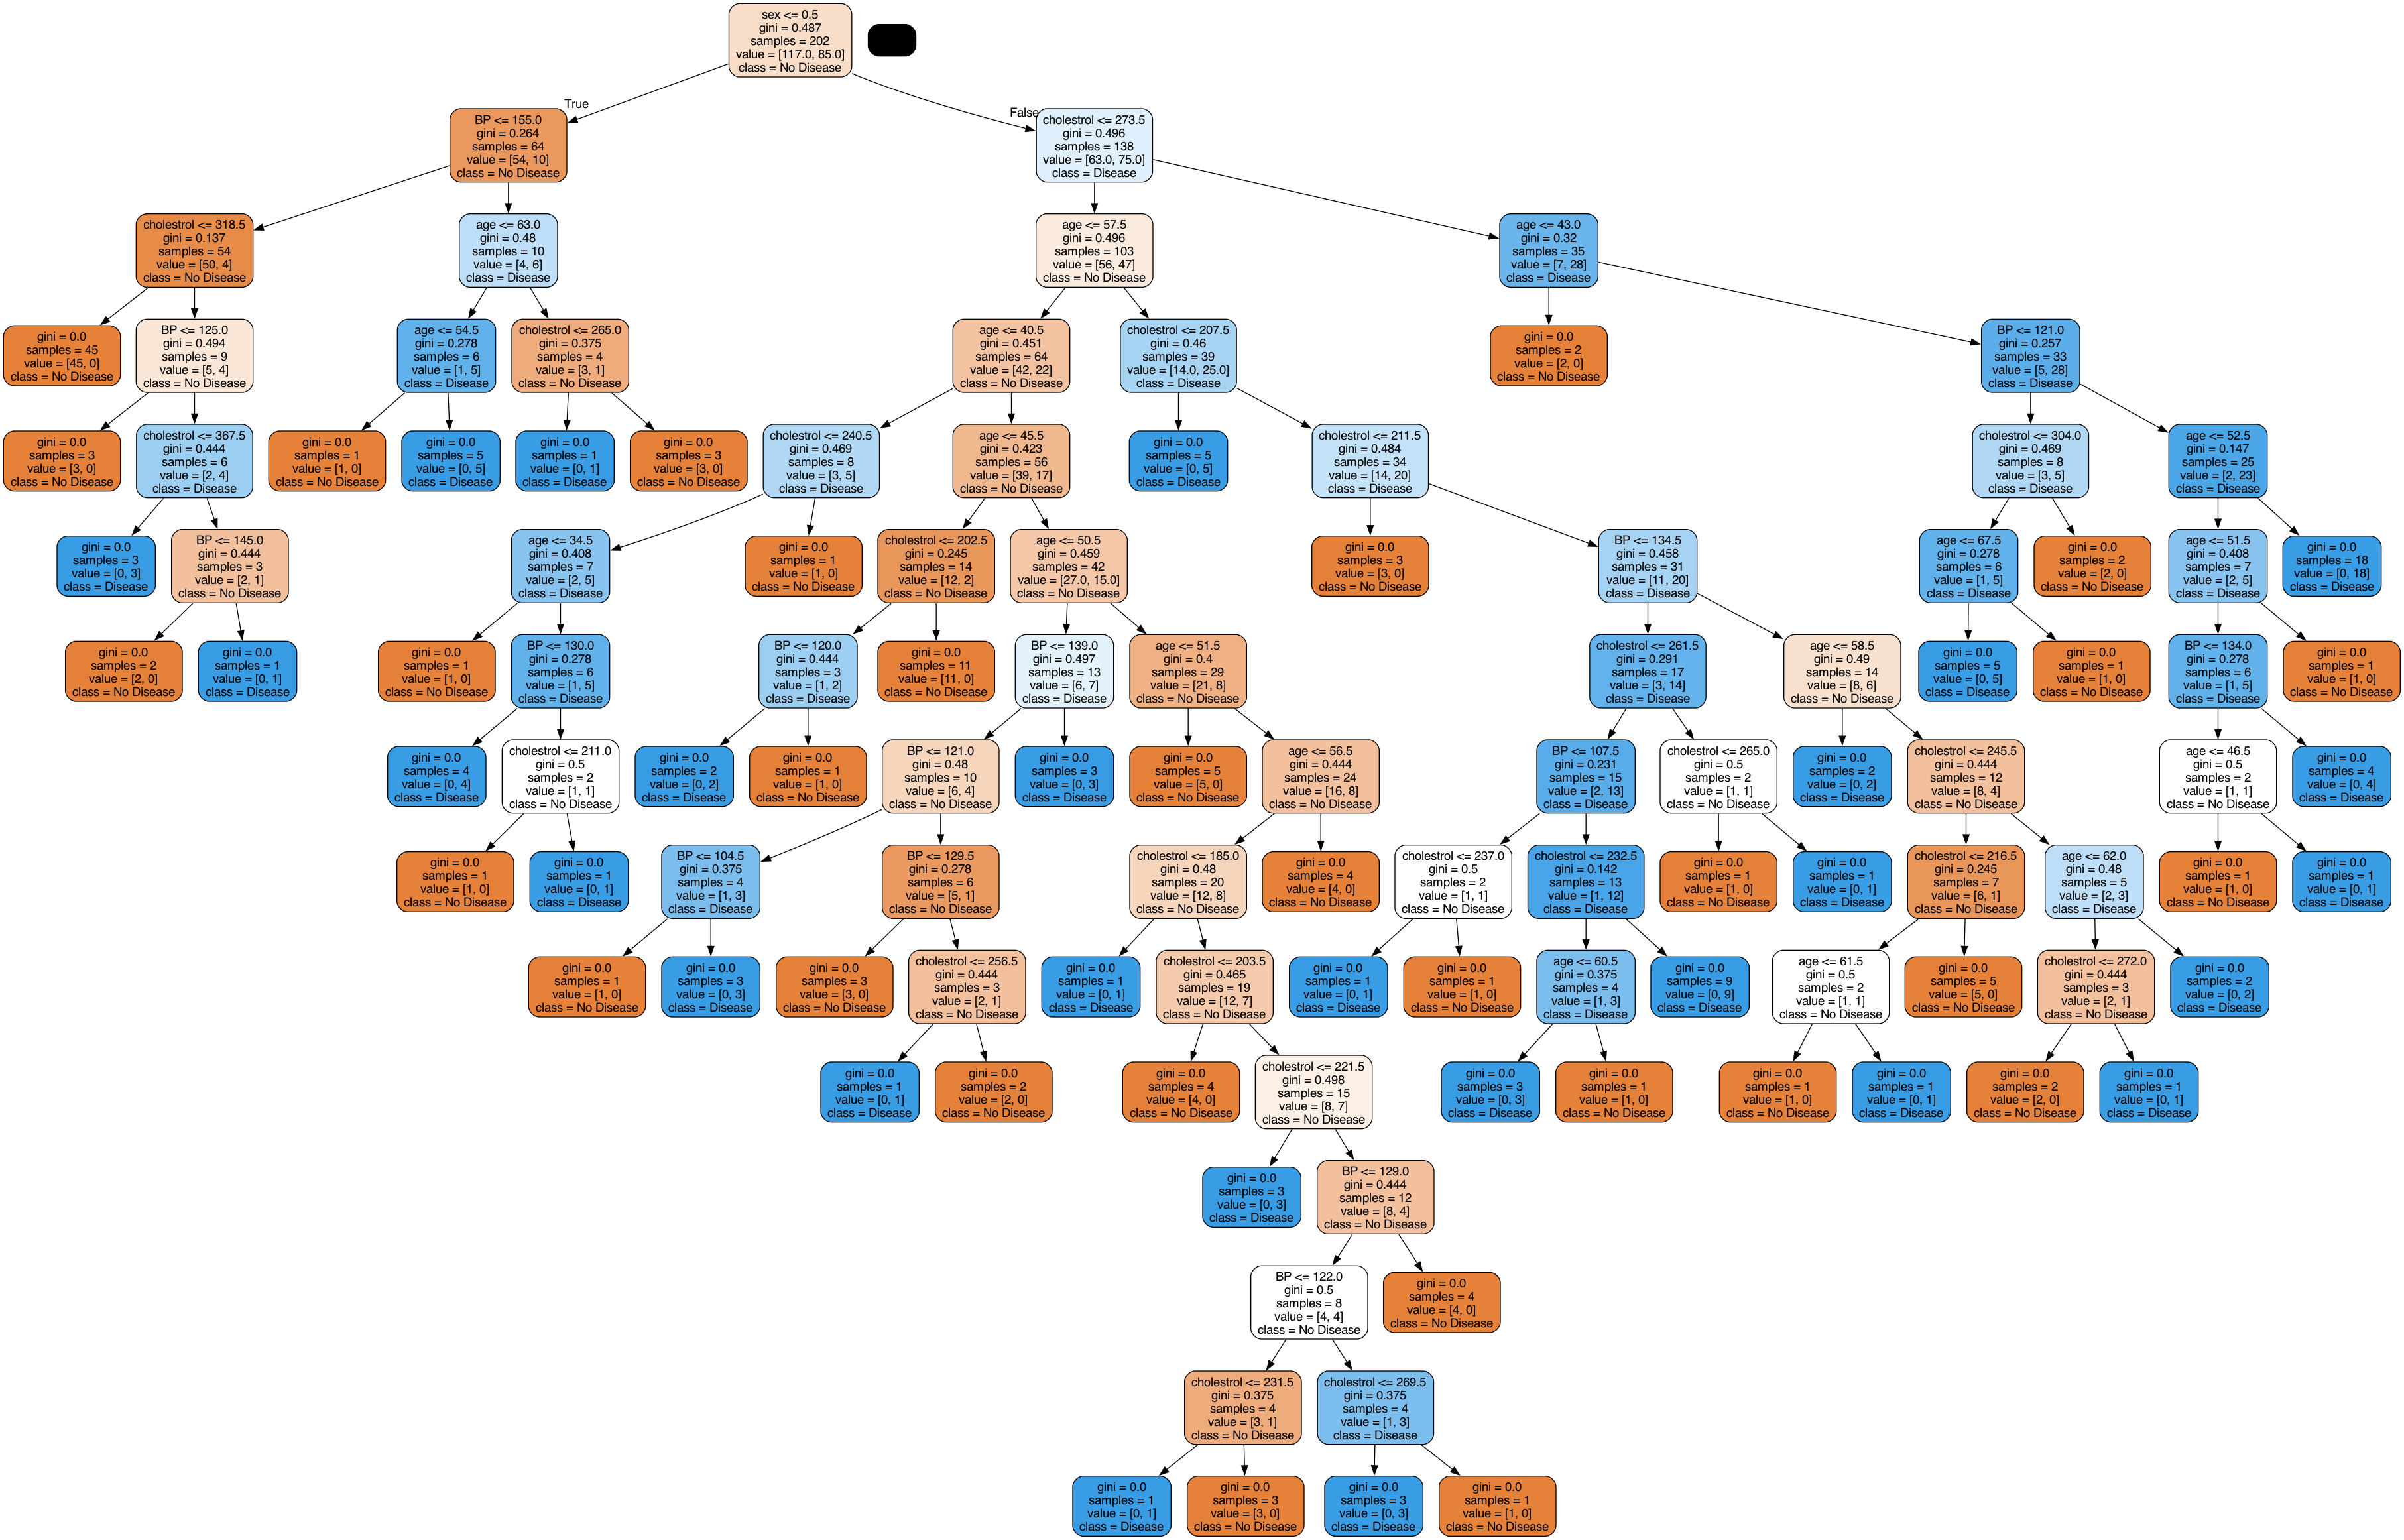

In [20]:
# let's have a look at our tree without any depth
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [21]:
# we got a huge decision tree with a lot of depth and levels.
# let's now evaluate this on our train set
evaluate_model(dt_classifier=dt_default)

Accuracy on the training set: 1.0 

Confusion Matrix:
 [[117   0]
 [  0  85]] 

Sensitivity: 1.0
--------------------------------------------------
Accuracy on the Test set: 0.6323529411764706 

Confusion Matrix:
 [[28  5]
 [20 15]] 

Sensitivity: 0.42857142857142855


- We can see that accuracy on the train set is 100% whereas on test set it is 42%. 
- This is a clear example of overfitting and hence we need to tune the hyperparameters. 
- Let's first control the depth of the tree

In [22]:
dt_depth = DecisionTreeClassifier(max_depth=4, random_state=39)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=39)

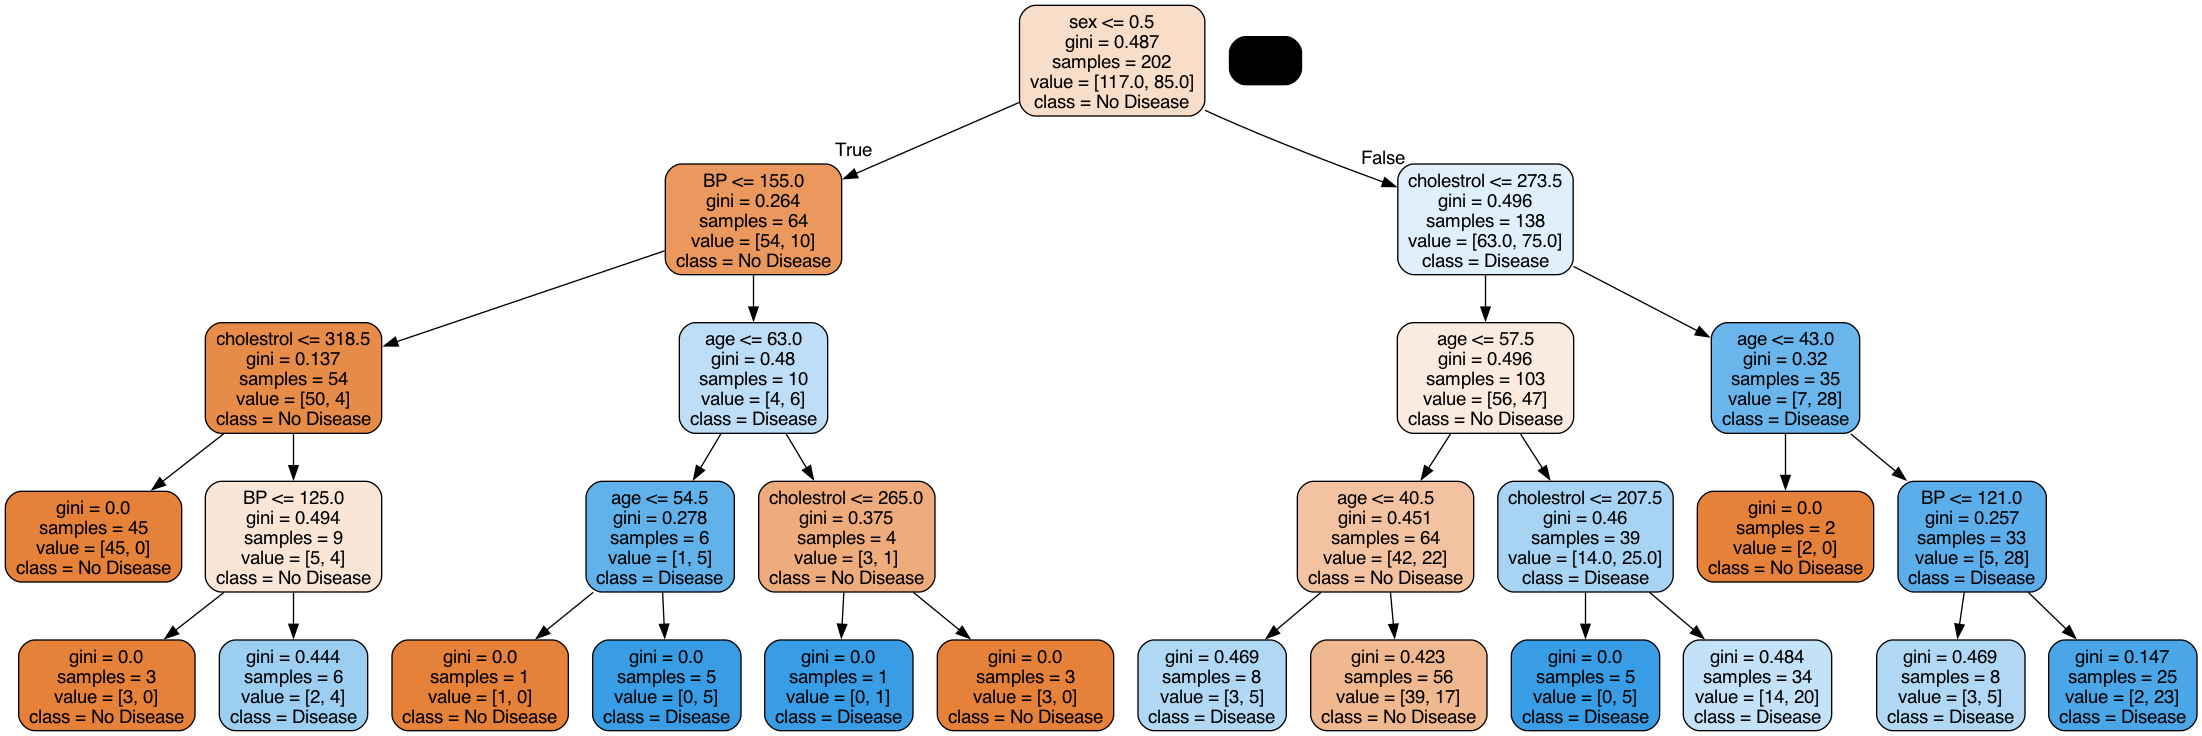

In [23]:
gph = get_dt_graph(dt_depth)
Image(gph.create_png())

In [24]:
evaluate_model(dt_depth)

Accuracy on the training set: 0.7970297029702971 

Confusion Matrix:
 [[93 24]
 [17 68]] 

Sensitivity: 0.8
--------------------------------------------------
Accuracy on the Test set: 0.6176470588235294 

Confusion Matrix:
 [[28  5]
 [21 14]] 

Sensitivity: 0.4


#### Now defining the minimum samples before split 

In [25]:
df_min_split = DecisionTreeClassifier(min_samples_split=20, random_state=39)
df_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=39)

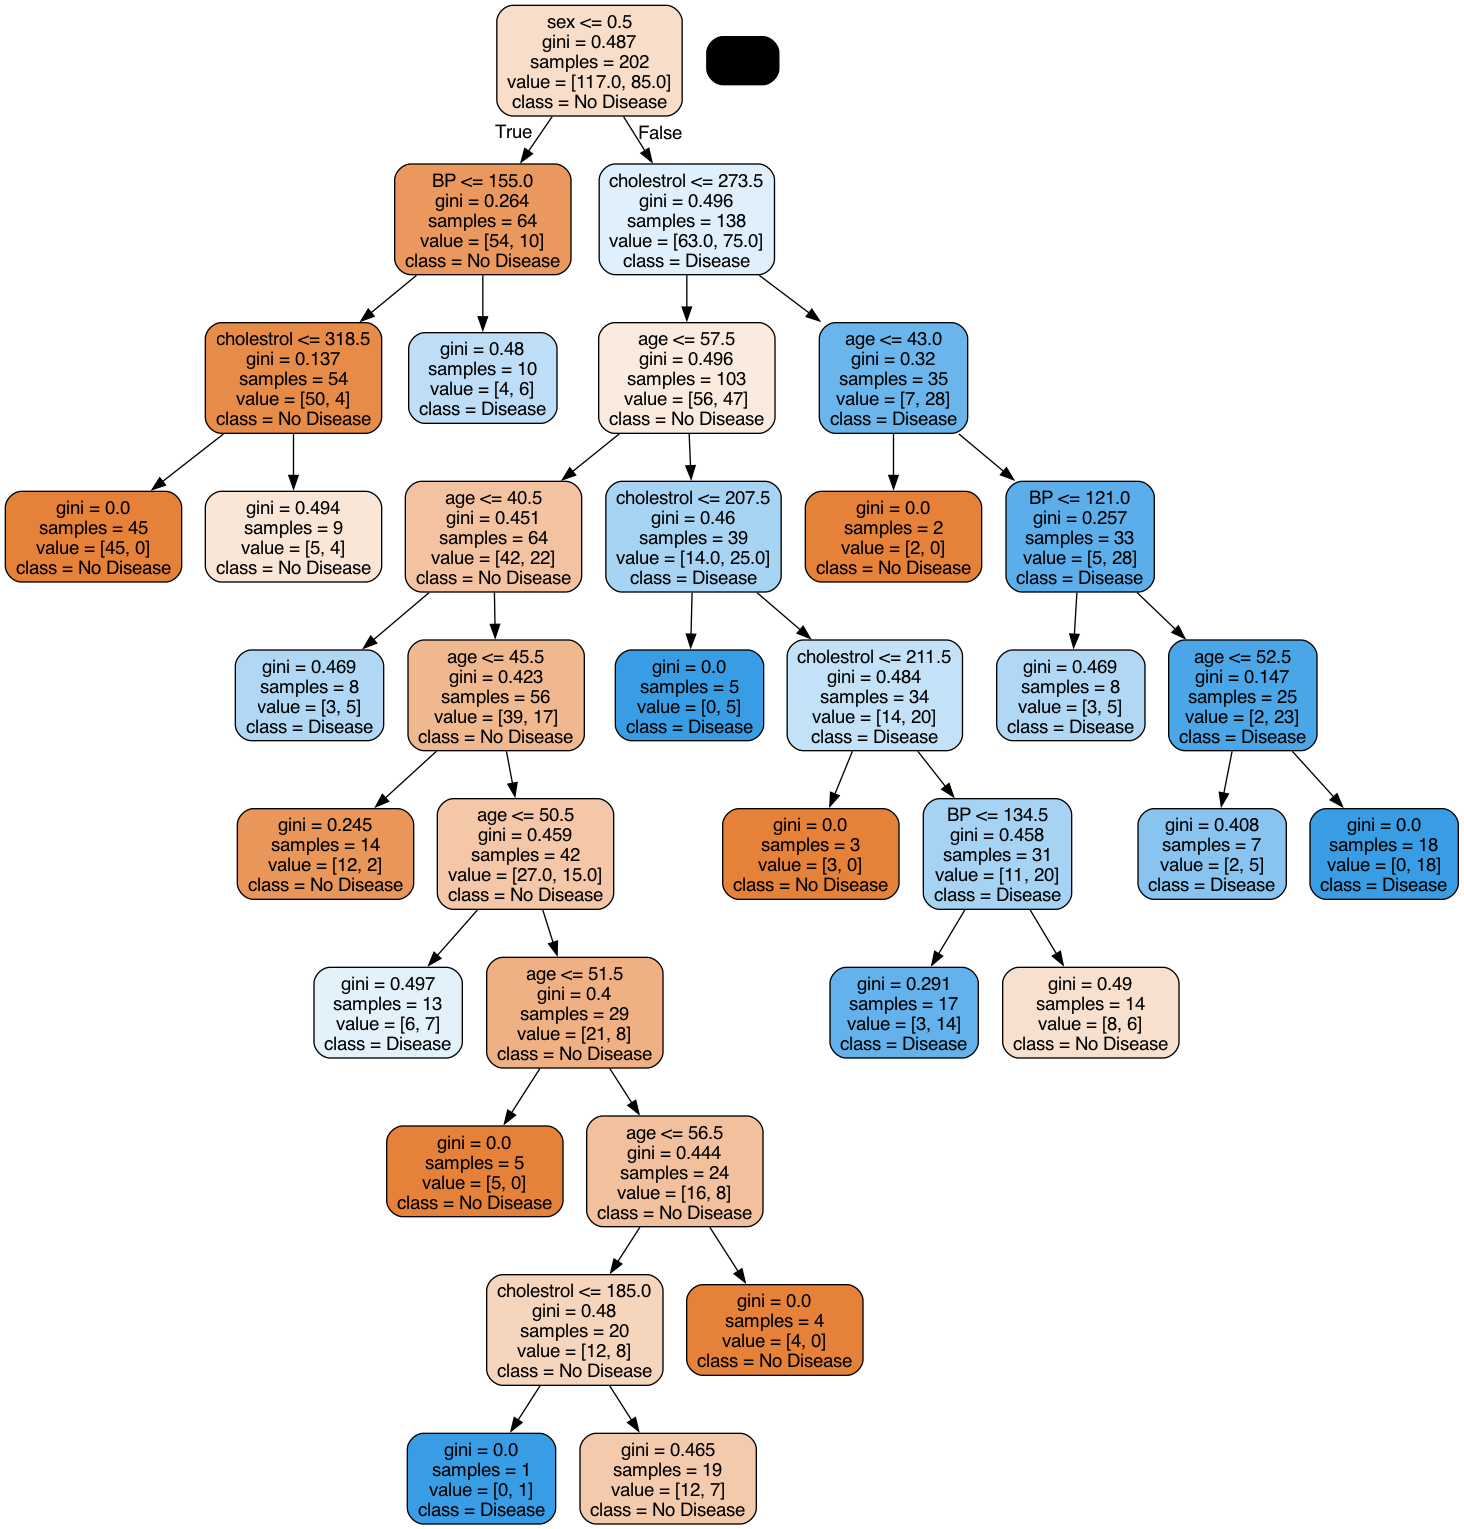

In [26]:
gph = get_dt_graph(df_min_split)
Image(gph.create_png())

In [27]:
# we can see tree got restricted and didn't overfit itself like last time. But it is still very large 
# let's check model's performance before tuning it further
evaluate_model(df_min_split)

Accuracy on the training set: 0.801980198019802 

Confusion Matrix:
 [[96 21]
 [19 66]] 

Sensitivity: 0.7764705882352941
--------------------------------------------------
Accuracy on the Test set: 0.6176470588235294 

Confusion Matrix:
 [[28  5]
 [21 14]] 

Sensitivity: 0.4


#### Let's specify the minimum samples in leaf node and see difference

In [28]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20)

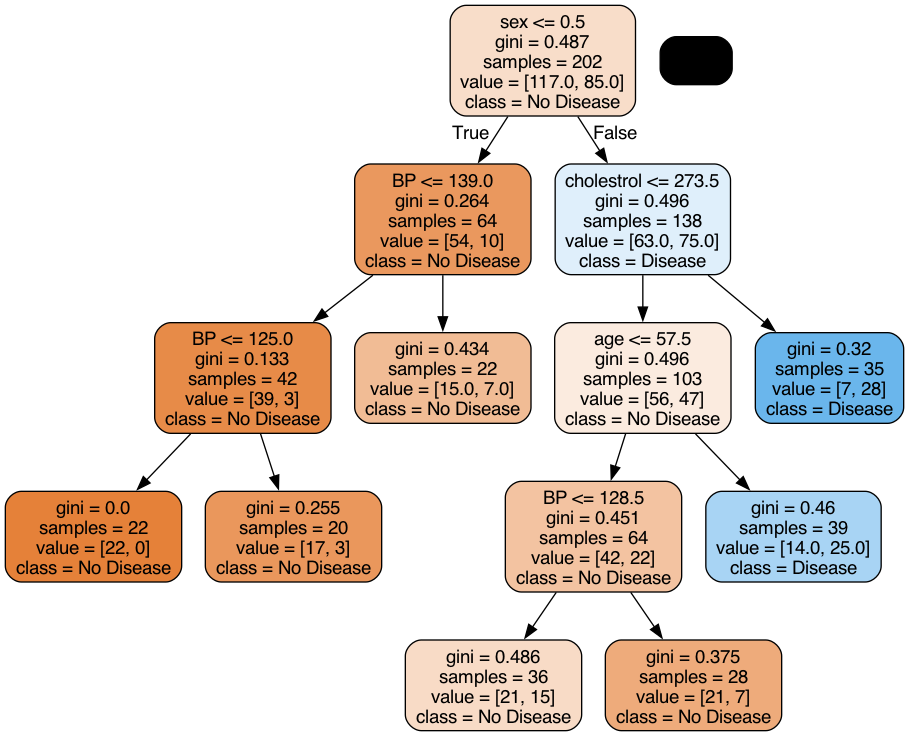

In [29]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [30]:
evaluate_model(dt_min_leaf)

Accuracy on the training set: 0.7376237623762376 

Confusion Matrix:
 [[96 21]
 [32 53]] 

Sensitivity: 0.6235294117647059
--------------------------------------------------
Accuracy on the Test set: 0.6176470588235294 

Confusion Matrix:
 [[27  6]
 [20 15]] 

Sensitivity: 0.42857142857142855


- We can see tree is now much smaller, depth is only 4. 
- On each tree node, minimum number of sample is 20 and it does not split further.
- But performance of our model is still not very good.
- We need to find best depth, best min_samples_split and best min_samples_leaf for our model to perform best on both train and test set.

#### Using Entropy instead of Gini

In [31]:
dt_min_leaf_entropy  = DecisionTreeClassifier(min_samples_leaf=20, random_state=39, criterion='entropy')
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=39)

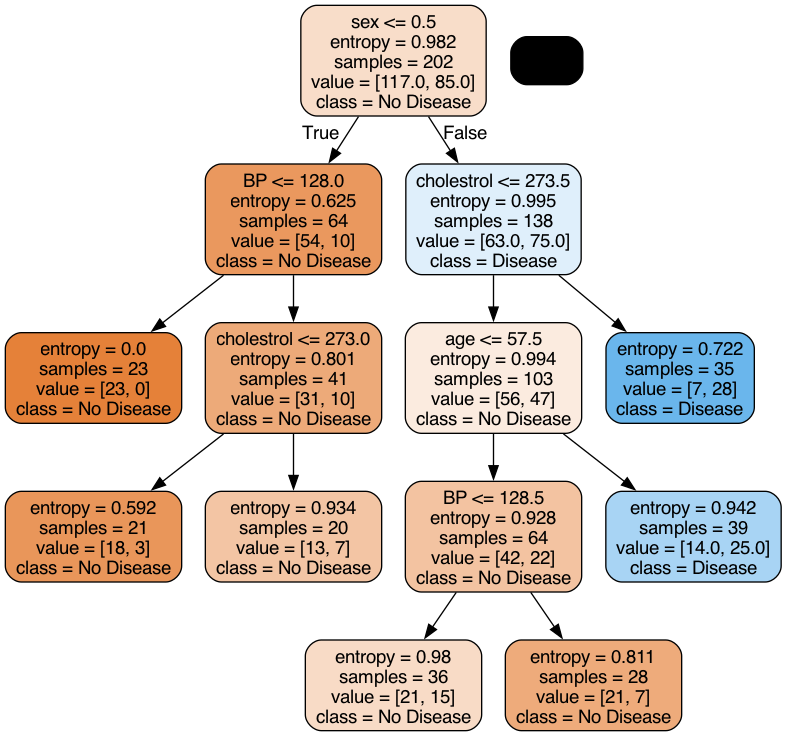

In [32]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [33]:
evaluate_model(dt_min_leaf_entropy)

Accuracy on the training set: 0.7376237623762376 

Confusion Matrix:
 [[96 21]
 [32 53]] 

Sensitivity: 0.6235294117647059
--------------------------------------------------
Accuracy on the Test set: 0.6176470588235294 

Confusion Matrix:
 [[27  6]
 [20 15]] 

Sensitivity: 0.42857142857142855


- We can see there is not much difference in tree graph using Entropy and Gini, just the values are of Entropy now. 
- This is because Entropy and Gini are numerically very similar. 

#### K-fold Cross Validation

![K-fold](assets/Screenshot%202024-07-21%20at%2010.12.18 PM.png)

- We will use grid search with cross-validation to find the optimal hyperparameters, so that neither our tree is too big (overfitting) nor it is very small (bad accuracy). 

#### Hyperparameter Tuning using Grid Search CV

In [34]:
dt = DecisionTreeClassifier(random_state=39)

In [35]:
# first we need to specify the different parameters we need to try and change during GridSearchCV
params = {
    'max_depth': np.arange(1,21),
    'min_samples_leaf': np.arange(1,101), 
    'criterion':['gini' , 'entropy']
}

In [36]:
# now we will use GridSearchCV to find best parameters for us using Cross validation
# within the train set it will split data for training and validation
# cv=4 means it will use 3/4th of training set to train the data and 1/4 to validate 
# also known as 4-fold cross validation
# n_jobs=-1 means if we have a multi core processor this will try to employ multi cores
# verbose = 1 will show how the progress or situation is
# it will take all this parameters and try all combinations possbile and select the parameters with best accuracy since that's what we are using to evalute scoring.
grid_search = GridSearchCV(estimator=dt, 
             param_grid=params,
             cv=4, 
             n_jobs=-1, verbose=1,
             scoring='accuracy')

In [37]:
# since we have 32000 fits it will take some time, we can define only few, for testing I am using lots of parameters.
import time
start = time.time()
grid_search.fit(X_train, y_train)
end = time.time()
print('Time taken for GridSearchCV to find best params:', end-start, 'seconds') 

Fitting 4 folds for each of 4000 candidates, totalling 16000 fits
Time taken for GridSearchCV to find best params: 18.47527813911438 seconds


/Users/deveshparashar/Projects/machineLearning/env/lib/python3.11/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [38]:
# let's have a look at few of the tests' records that GridSearchCV performed 
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003612,0.000115,0.002082,0.000105,gini,1,1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.686275,0.568627,0.62,0.68,0.638725,0.048034,1452
1,0.004170,0.000547,0.002208,0.000279,gini,1,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.686275,0.568627,0.62,0.68,0.638725,0.048034,1452
2,0.003050,0.000485,0.001657,0.000261,gini,1,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.686275,0.568627,0.62,0.68,0.638725,0.048034,1452
3,0.002293,0.000172,0.001572,0.000312,gini,1,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.686275,0.568627,0.62,0.68,0.638725,0.048034,1452
4,0.002470,0.000506,0.001581,0.000289,gini,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.686275,0.568627,0.62,0.68,0.638725,0.048034,1452


In [39]:
# there were 4000 combinations 
cv_df.shape

(4000, 15)

In [40]:
# printing top 5 results in terms of mean_test_score
cv_df.nlargest(5, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
216,0.002196,0.000264,0.001606,0.000392,gini,3,17,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.705882,0.72549,0.74,0.68,0.712843,0.022498,1
217,0.002357,0.000140,0.001695,0.000087,gini,3,18,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.705882,0.72549,0.74,0.68,0.712843,0.022498,1
218,0.002610,0.000340,0.001837,0.000243,gini,3,19,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.705882,0.72549,0.76,0.66,0.712843,0.036141,1
316,0.002316,0.000150,0.001638,0.000247,gini,4,17,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.705882,0.72549,0.74,0.68,0.712843,0.022498,1
317,0.002331,0.000315,0.001747,0.000375,gini,4,18,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.705882,0.72549,0.74,0.68,0.712843,0.022498,1


In [41]:
# we can also use this to check our best score
grid_search.best_score_


np.float64(0.712843137254902)

In [42]:
# similarly for best estimator
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=np.int64(3), min_samples_leaf=np.int64(17),
                       random_state=39)

- So best parameters we got are:
    - max_depth = 3
    - min_samples_leaf = 17
    - criterion = gini

In [43]:
# let's evaluate model's performance on test set also with these parameters
dt_best = grid_search.best_estimator_
evaluate_model(dt_best)

Accuracy on the training set: 0.7376237623762376 

Confusion Matrix:
 [[96 21]
 [32 53]] 

Sensitivity: 0.6235294117647059
--------------------------------------------------
Accuracy on the Test set: 0.6176470588235294 

Confusion Matrix:
 [[27  6]
 [20 15]] 

Sensitivity: 0.42857142857142855


- Using this we got accuracy of **73%** on train set and **61%** on test set. 
- This is still not very good but we can try more different combinations of hyperparamters to tune it further.
- Also, the target variable is imbalanced which is causing sensitivity to be so less.

#### Building Tree of our best model so far.

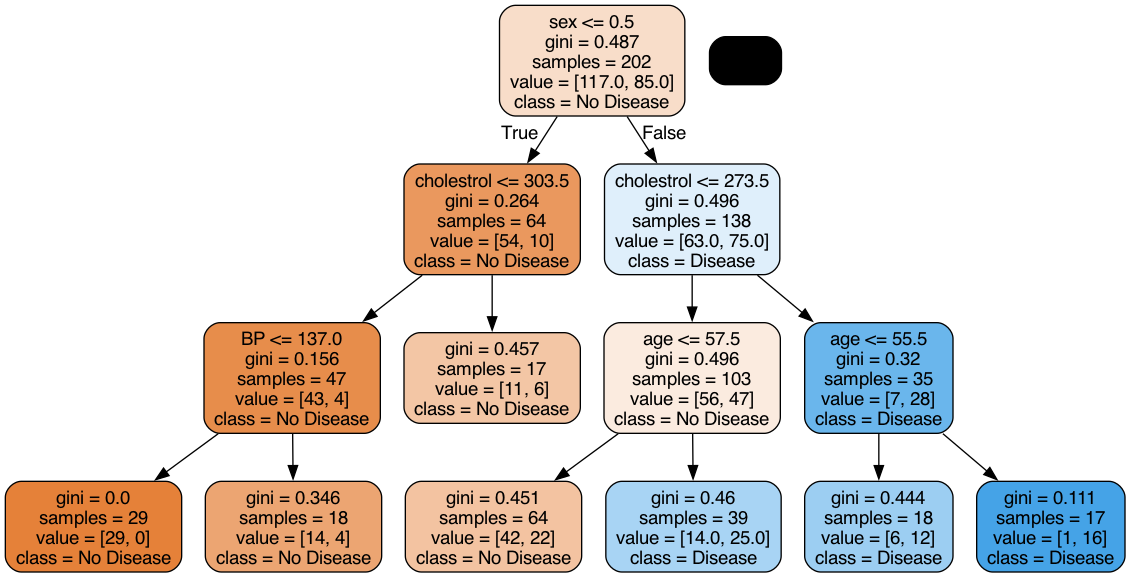

In [44]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())